In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('./Data/us_states_clean.csv').drop(columns = ['Unnamed: 0'])
df.shape

(29844, 7)

In [3]:
df.tail()

,date,fips,cases,deaths,state_code,new_cases,new_deaths
29839,2021-10-27,56,101912,1174,WY,488.0,0.0
29840,2021-10-28,56,102403,1174,WY,491.0,0.0
29841,2021-10-29,56,102926,1174,WY,523.0,0.0
29842,2021-10-30,56,102926,1174,WY,0.0,0.0
29843,2021-10-31,56,102926,1174,WY,0.0,0.0


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
states_adj = {}

with open('./Data/usa-state-data.json', 'r') as state_json:
    states_adj = json.load(state_json)
    
len(states_adj)

51

In [6]:
df['region'] = df['state_code'].apply(lambda x: states_adj[x]['region'])
df = df.groupby(['date', 'region'])['new_cases'].agg('sum').reset_index()
df = df[df['new_cases'] > 0]

In [7]:
df = df.pivot(index = 'date', columns = 'region', values = 'new_cases').fillna(0)
df['Total'] = df['Midwest'] + df['Northeast'] + df['South'] + df['West']
df = df.reset_index()

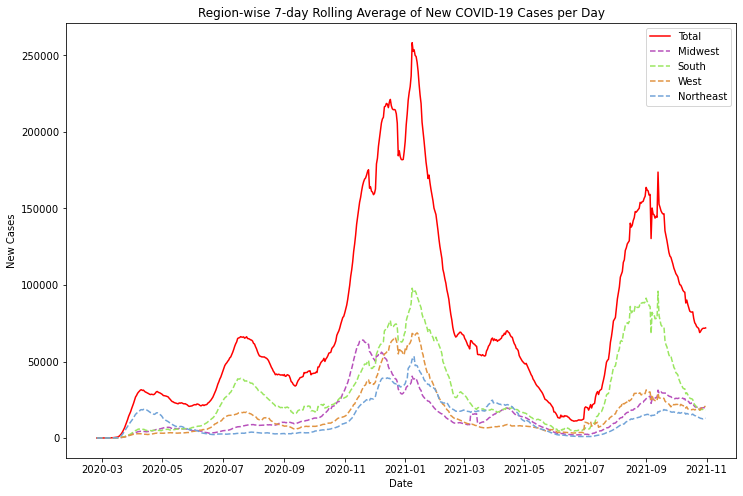

In [9]:
plt.figure(figsize = (12, 8))
plt.plot(df['date'], df['Total'].rolling(7).mean(), color = '#ff0000', label = 'Total')
plt.plot(df['date'], df['Midwest'].rolling(7).mean(), ls = '--', color = '#b750bb', label = 'Midwest')
plt.plot(df['date'], df['South'].rolling(7).mean(), ls = '--', color = '#9ae660', label = 'South')
plt.plot(df['date'], df['West'].rolling(7).mean(), ls = '--', color = '#e19442', label = 'West')
plt.plot(df['date'], df['Northeast'].rolling(7).mean(), ls = '--', color = '#71a3d8', label = 'Northeast')
plt.title('Region-wise 7-day Rolling Average of New COVID-19 Cases per Day')
plt.xlabel('Date')
plt.ylabel('New Cases')
# plt.yscale('log')
plt.legend()
plt.savefig('./Figs/covid_basic')
plt.show()
plt.close()

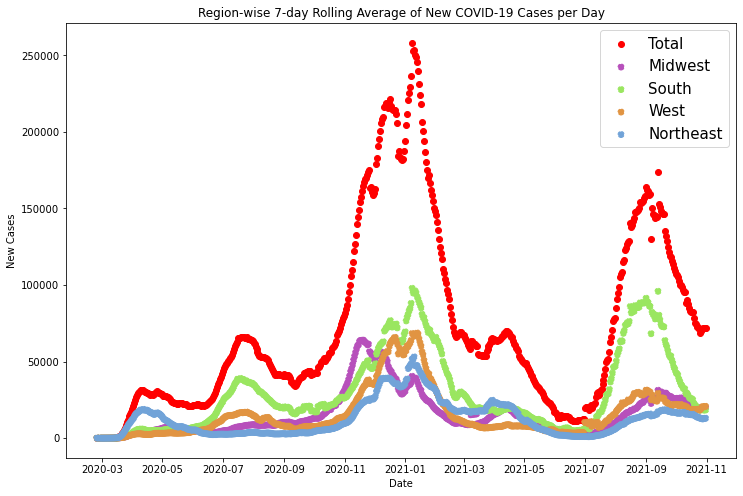

In [15]:
plt.figure(figsize = (12, 8))
plt.scatter(df['date'], df['Total'].rolling(7).mean(), color = '#ff0000', label = 'Total')
plt.scatter(df['date'], df['Midwest'].rolling(7).mean(), ls = '--', color = '#b750bb', label = 'Midwest')
plt.scatter(df['date'], df['South'].rolling(7).mean(), ls = '--', color = '#9ae660', label = 'South')
plt.scatter(df['date'], df['West'].rolling(7).mean(), ls = '--', color = '#e19442', label = 'West')
plt.scatter(df['date'], df['Northeast'].rolling(7).mean(), ls = '--', color = '#71a3d8', label = 'Northeast')
plt.title('Region-wise 7-day Rolling Average of New COVID-19 Cases per Day')
plt.xlabel('Date')
plt.ylabel('New Cases')
# plt.yscale('log')
plt.legend(prop={'size': 15})
# plt.savefig('./Figs/covid_basic')
plt.show()
plt.close()